# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 


In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [5]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

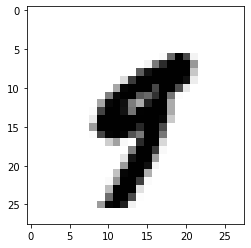

In [6]:
plt.imshow(X[36000].reshape(28,28),cmap = plt.cm.binary, interpolation="nearest")

In [7]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [22]:
X_train=pd.DataFrame(X[:60000])
y_train=pd.DataFrame(y[:60000])

In [23]:
X_test=pd.DataFrame(X[60000:])
y_test=pd.DataFrame(y[60000:])

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [25]:
y_train_5=y_train[0].apply(lambda x: 1 if x=='5' else 0)

In [26]:
y_test_5=y_test[0].apply(lambda x: 1 if x=='5' else 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train_5)

C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
model.predict(X)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [47]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

### Does the classifier predict correctly the 36000th digit we picked before?

In [34]:
model.predict(X)[36000]

0

In [35]:
y[36000]

'9'

In [36]:
# Yes, it did

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [37]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [58]:
never_5_clf.fit(X_train, y_train_5)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

#### Logistic Regression (50% cutoff)

In [49]:
model.score(X_train,y_train_5)

0.9783333333333334

In [50]:
model.score(X_test,y_test_5)

0.9774

In [51]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, model.predict(X_train))

0.9153396492642613

In [52]:
precision_score(y_test_5, model.predict(X_test))

0.9021739130434783

In [53]:
recall_score(y_train_5, model.predict(X_train))

0.83766832687696

In [54]:
recall_score(y_test_5, model.predict(X_test))

0.8374439461883408

In [55]:
from sklearn.metrics import f1_score

In [56]:
f1_score(y_train_5, model.predict(X_train))

0.8747832787516855

In [57]:
f1_score(y_test_5, model.predict(X_test))

0.8686046511627907

#### Dumb classifier

In [59]:
precision_score(y_test_5, never_5_clf.predict(X_test))

C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [61]:
recall_score(y_test_5, never_5_clf.predict(X_test))

0.0

In [60]:
f1_score(y_test_5, never_5_clf.predict(X_test))

C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

In [66]:
roc_curve(y_test_5, never_5_clf.predict(X_test))

(array([0., 1.]), array([0., 1.]), array([1, 0]))

In [67]:
roc_curve(y_test_5, model.predict(X_test))

(array([0.        , 0.00889328, 1.        ]),
 array([0.        , 0.83744395, 1.        ]),
 array([2, 1, 0], dtype=int64))

### Now find the roc_auc_score for each. 

In [64]:
roc_auc_score(y_test_5, never_5_clf.predict(X_test))

0.5

In [65]:
roc_auc_score(y_test_5, model.predict(X_test))

0.914275332777965

### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

In [68]:
from yellowbrick.classifier import ROCAUC

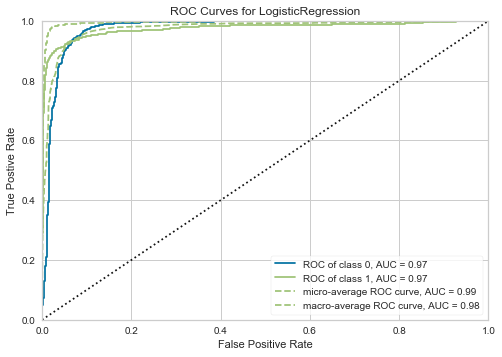

In [71]:
visualizer=ROCAUC(model)
visualizer.fit(X_train, y_train_5)        
visualizer.score(X_test, y_test_5)    
visualizer.show()   